In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv("heart.csv")
df = data.copy()

In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.shape

(303, 14)

Check for duplicate records/rows

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(302, 14)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})

<AxesSubplot:ylabel='Frequency'>

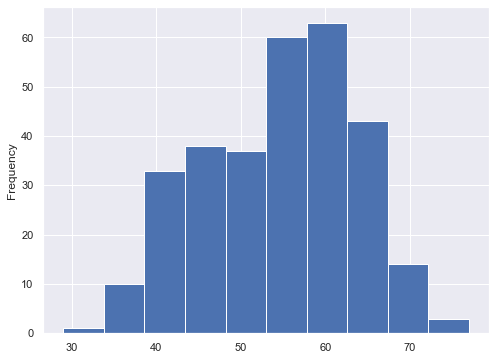

In [8]:
df['age'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

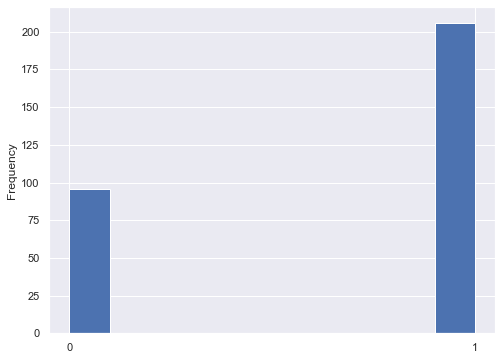

In [9]:
df['sex'].plot(kind="hist", xticks = [0,1])

<AxesSubplot:>

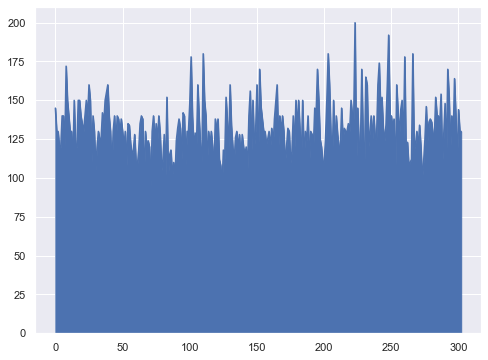

In [10]:
df['trestbps'].plot(kind="area")

<AxesSubplot:ylabel='Frequency'>

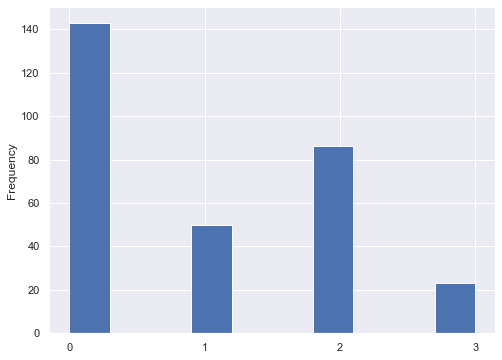

In [11]:
df['cp'].plot(kind="hist", xticks = [0,1,2,3])

<AxesSubplot:ylabel='Frequency'>

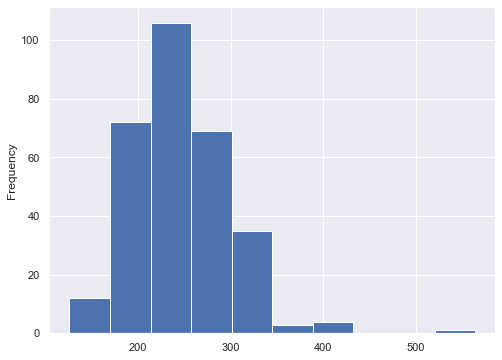

In [12]:
df['chol'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

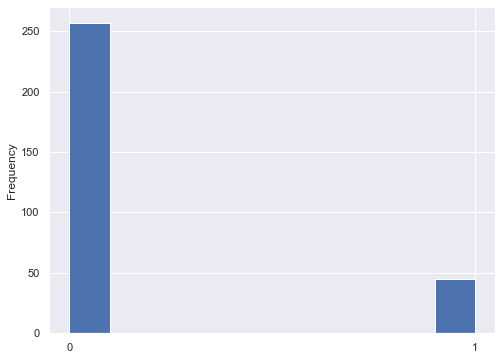

In [13]:
df['fbs'].plot(kind="hist", xticks = [0,1])

<AxesSubplot:ylabel='Frequency'>

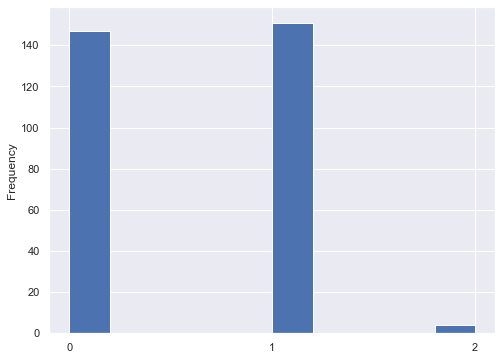

In [14]:
df['restecg'].plot(kind="hist", xticks = [0,1,2])

<AxesSubplot:ylabel='Frequency'>

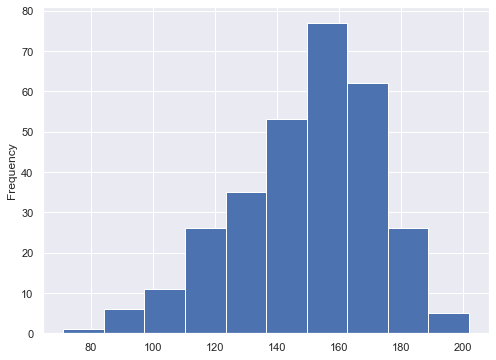

In [15]:
# Maximum heart rate achieved
df['thalach'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

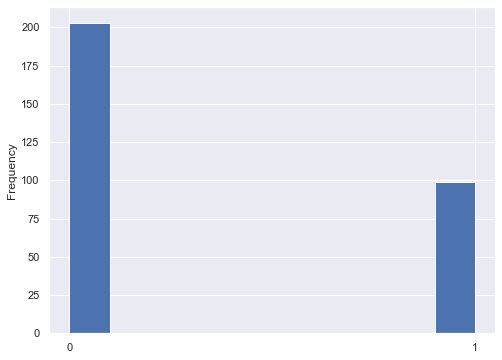

In [16]:
df['exang'].plot(kind="hist", xticks=[0,1])

<AxesSubplot:ylabel='Frequency'>

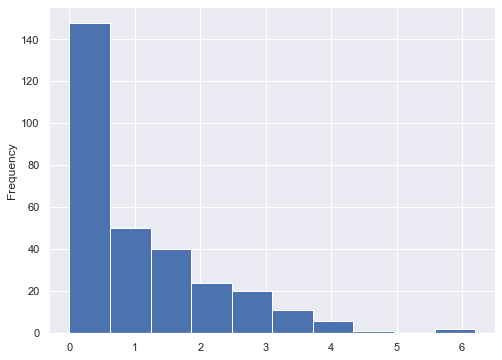

In [17]:
# ST depression induced by exercise relative to rest
df['oldpeak'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

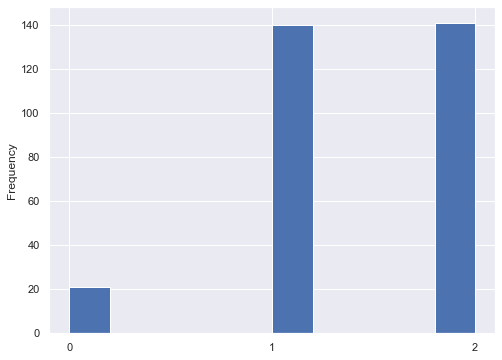

In [18]:
df['slope'].plot(kind="hist", xticks=[0,1,2])

<AxesSubplot:ylabel='Frequency'>

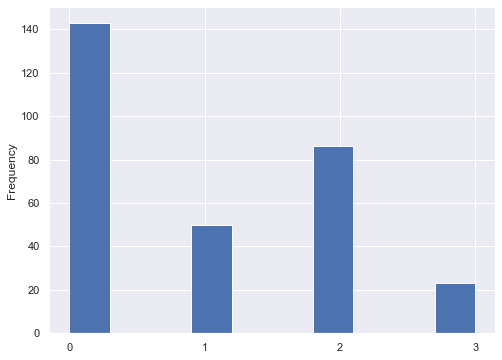

In [19]:
df['cp'].plot(kind="hist", xticks=[0,1,2,3])

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

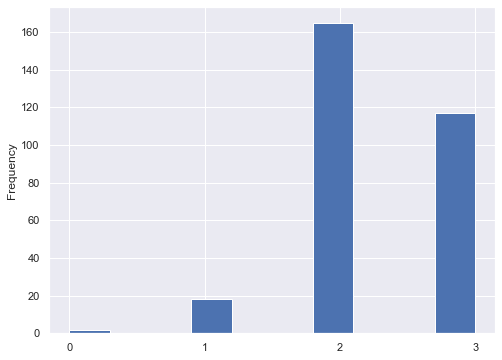

In [21]:
df['thal'].plot(kind='hist', xticks=[0,1,2,3])

<AxesSubplot:ylabel='Frequency'>

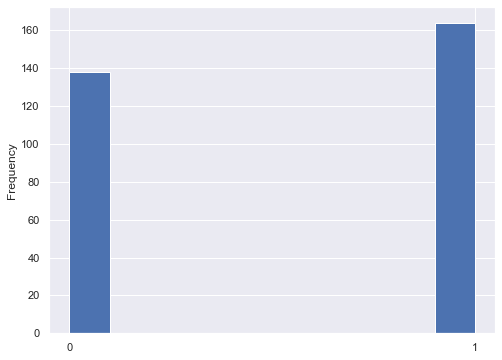

In [22]:
df['target'].plot(kind="hist", xticks=[0,1])

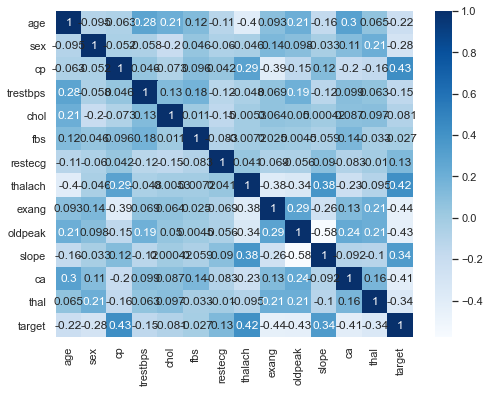

In [23]:
correlation = df.corr()
fig = sns.heatmap(correlation, annot = True, cmap = "Blues")

In [24]:
filt = correlation>0.4
correlation[filt]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.432080
trestbps,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.419955
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [25]:
# Check for null values in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0


In [28]:
input_cols = df.columns[:-1]
target = 'target'

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[input_cols])
df[input_cols] = scaler.transform(df[input_cols])

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text

train_x, test_x, train_y, test_y = train_test_split(df[input_cols], df[target], test_size = 0.3, random_state = 42)

In [30]:
dtc_model = DecisionTreeClassifier(random_state = 42)
dtc_model.fit(train_x, train_y)
dtc_train_preds = dtc_model.predict(train_x)
dtc_test_preds = dtc_model.predict(test_x)
print("DTC Train accuracy score : ", round(accuracy_score(dtc_train_preds, train_y)*100, 2))
print("DTC Test accuracy score : ", round(accuracy_score(dtc_test_preds, test_y)*100, 2))

DTC Train accuracy score :  100.0
DTC Test accuracy score :  82.42


In [31]:
print(dtc_test_preds)
dtc_model.classes_

[0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1]


array([0, 1], dtype=int64)

In [32]:
dtc_feature_importances = pd.DataFrame({'Features' : test_x.columns,
                                    'Importance' : dtc_model.feature_importances_
                                   }).sort_values(by = 'Importance', ascending=False)
dtc_feature_importances.head()

,Features,Importance
2,cp,0.280165
11,ca,0.199504
9,oldpeak,0.103863
12,thal,0.083815
10,slope,0.071017


<AxesSubplot:title={'center':'Decision Tree Feature Importance'}, xlabel='Importance', ylabel='Features'>

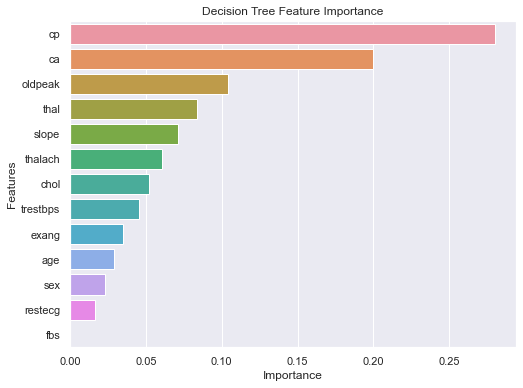

In [33]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data = dtc_feature_importances, y='Features', x='Importance')

In [34]:
rfc_model = RandomForestClassifier(random_state = 42)
rfc_model.fit(train_x, train_y)
rfc_train_preds = rfc_model.predict(train_x)
rfc_test_preds = rfc_model.predict(test_x)
print("RFC Train accuracy score : ",round(accuracy_score(rfc_train_preds, train_y)*100, 2))
print("RFC Test accuracy score : ",round(accuracy_score(rfc_test_preds, test_y)*100, 2))

RFC Train accuracy score :  100.0
RFC Test accuracy score :  84.62


In [35]:
print(rfc_test_preds)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1]


In [36]:
rfc_feature_importances = pd.DataFrame({'Features' : test_x.columns,
                                    'Importance' : rfc_model.feature_importances_
                                   }).sort_values(by = 'Importance', ascending=False)
rfc_feature_importances.head()

,Features,Importance
7,thalach,0.137064
2,cp,0.127738
11,ca,0.117740
9,oldpeak,0.104267
12,thal,0.095401


<AxesSubplot:title={'center':'Decision Tree Feature Importance'}, xlabel='Importance', ylabel='Features'>

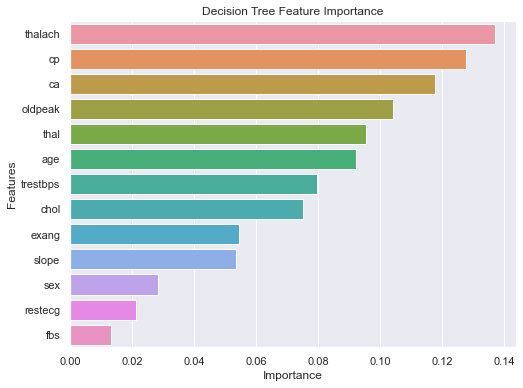

In [37]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data = rfc_feature_importances, y='Features', x='Importance')

In [38]:
def predict_inputs(model, inputs):
    df = pd.DataFrame([inputs])
    df[input_cols] = scaler.transform(df[input_cols])
    x_input = df[input_cols]
    pred = model.predict(x_input)
    prob = model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    return (pred, prob)

In [39]:
rfc_model.predict_proba([[62, 0, 0, 124, 209, 0, 1, 163, 0, 0.0, 2, 0, 2]])

array([[0.41, 0.59]])

In [40]:
data.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [41]:
import pickle

with open('heart_dtc.pkl', 'wb+') as f:
    pickle.dump(rfc_model, f)
# pickle.dump(rfc_model, open('heart_rfc_model.sav', 'wb'))
# pickle.dump(dtc_model, open('heart_dtc_model.sav', 'wb'))

In [42]:
# while(True):
#     option = int(input("1. Predict \n2. Quit\nChoose one option : "))
#     if option == 1 :
#         inputs = {'age' : int(input('Enter your age : ')),
#                   'sex' : int(input('Sex : ')),
#                   'cp' : int(input('Chest pain : ')),
#                   'trestbps' : int(input()),
#                   'chol' : int(input()),
#                   'fbs' : int(input()),
#                   'restecg' : int(input()),
#                   'thalach' : int(input()),
#                   'exang' : int(input()),
#                   'oldpeak' : float(input()),
#                   'slope' : int(input()),
#                   'ca' : int(input()),
#                   'thal' : int(input())}
        
#         Prediction, Probability = predict_inputs(rfc_model, inputs)
#         if Prediction : 
#             print("\nYes, the patient favourable to get heart disease.")
#         else :
#             print("\nNo, the patient is not favourable to get heart disease.")
#     else:
#         print("\nSorry, you choose to quit.")
#         break